In [2]:
import importlib
import aobox.model
import aobox.plot
import numpy as np
import matplotlib.pyplot as plt
import time
import ipywidgets as widgets
from IPython.display import display
%matplotlib notebook
importlib.reload(aobox.plot)
importlib.reload(aobox.model)

<module 'aobox.model' from '/Users/todd/Postdoc/aobox-model/aobox/model.py'>

In [3]:
tau = widgets.FloatSlider(min=0.08, max=0.12, step=0.001, description=r"$\tau$ [Pa]", 
                         readout_format='.3f')
kv = widgets.FloatSlider(min=1e-5, max=1e-4, step=1e-7, description=r"$\kappa_{v}$ [m$^2$ s$^{-1}$]", 
                         readout_format='.2e')
kgm = widgets.FloatSlider(min=5e2, max=3e3, step=1.0, description=r"$\kappa_{GM}$ [m$^2$ s$^{-1}$]", 
                         readout_format='.3f')
taus = widgets.FloatSlider(min=15, max=45, step=0.1, description=r"$\tau_{s}$ [day]", 
                           readout_format='.1f')
vm = widgets.FloatSlider(min=0.4, max=1.2, step=0.01, description=r"$v_m$ [m s$^{-1}$]", 
                           readout_format='.2f')
lambdalw = widgets.FloatSlider(min=0.5, max=2.5, step=0.01, description=r"$\lambda_{LW}$ [W m$^{-2}$ K$^{-1}$]", 
                               readout_format='.2f')

display(tau, kv, kgm, taus, vm, lambdalw)

FloatSlider(value=0.08, description='$\\tau$ [Pa]', max=0.12, min=0.08, readout_format='.3f', step=0.001)

FloatSlider(value=1e-05, description='$\\kappa_{v}$ [m$^2$ s$^{-1}$]', max=0.0001, min=1e-05, readout_format='…

FloatSlider(value=500.0, description='$\\kappa_{GM}$ [m$^2$ s$^{-1}$]', max=3000.0, min=500.0, readout_format=…

FloatSlider(value=15.0, description='$\\tau_{s}$ [day]', max=45.0, min=15.0, readout_format='.1f')

FloatSlider(value=0.4, description='$v_m$ [m s$^{-1}$]', max=1.2, min=0.4, step=0.01)

FloatSlider(value=0.5, description='$\\lambda_{LW}$ [W m$^{-2}$ K$^{-1}$]', max=2.5, min=0.5, step=0.01)

In [4]:
# Get values into parms array
parms = np.array([p.value for p in [tau, kv, kgm, taus, vm, lambdalw]])

# Perform a salt spinup run
nyear = 2000
diags_cont_salt = aobox.model.run(init=None, parms=parms, nyear=nyear, forcing_type='spinup')
print('completed salty run')

# Perform a no salt spinup run
nyear = 2000
diags_cont_nosalt = aobox.model.run(init=None, parms=parms, nyear=nyear, forcing_type='spinup', fix_salt=True)
print('completed fresh run')


KeyboardInterrupt: 

<IPython.core.display.Javascript object>


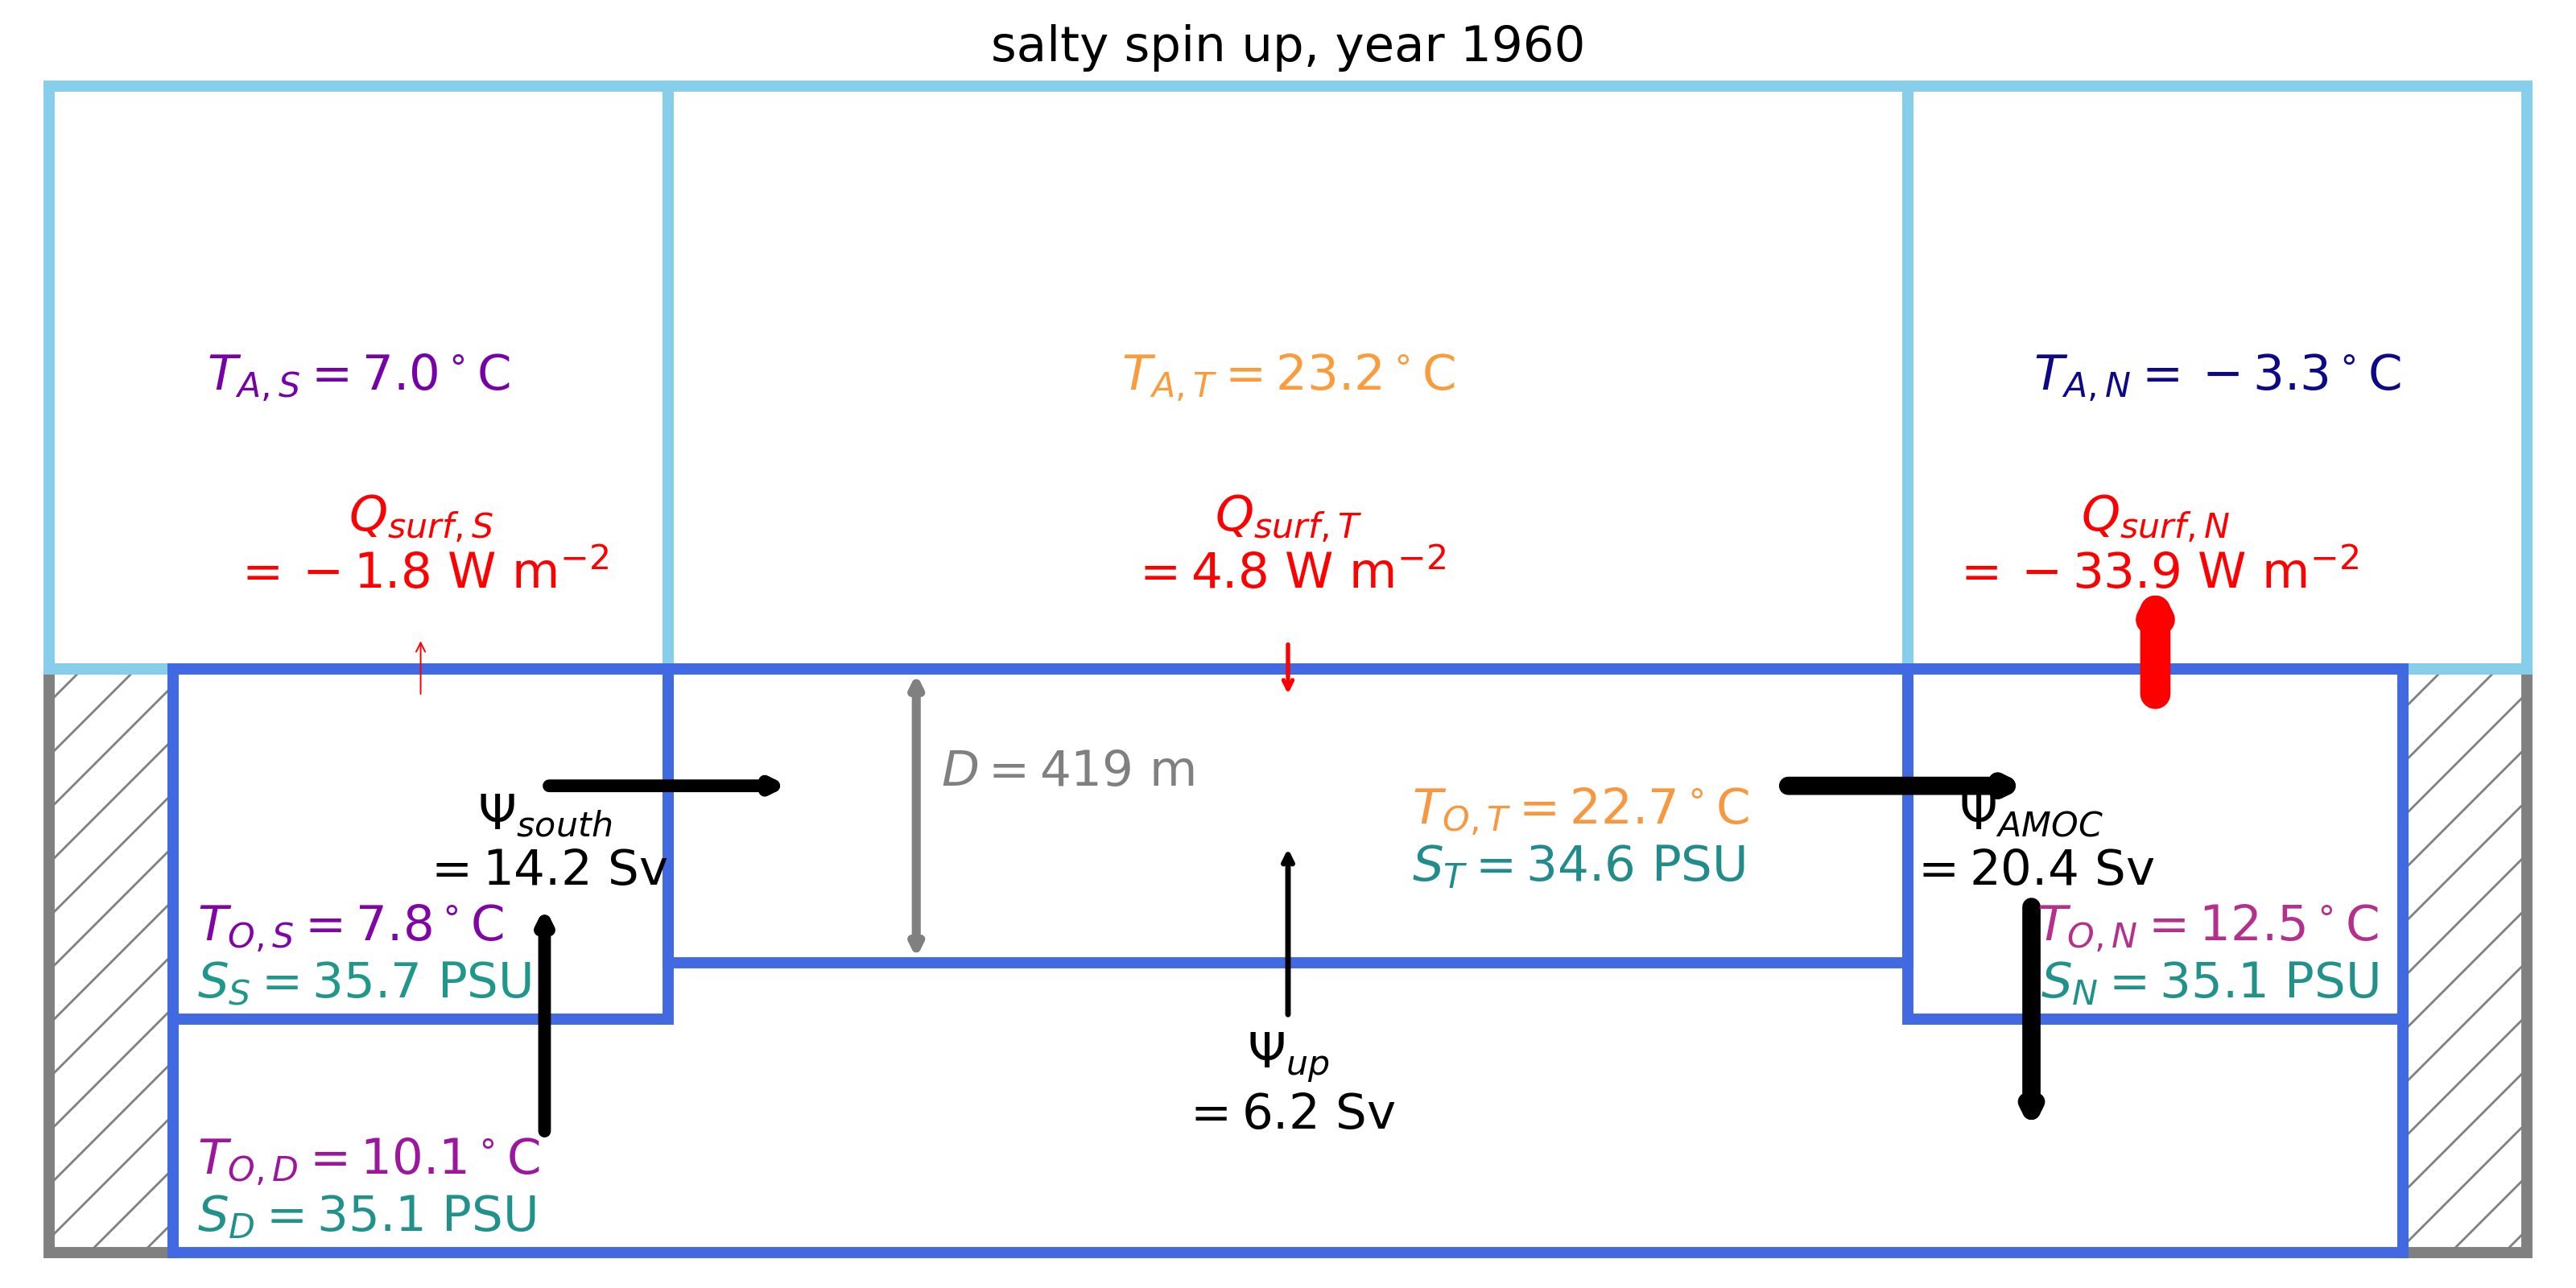

In [25]:
# Plot time ev. of salty spin up
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=100, tight_layout=True)

diags = diags_cont_salt
nstep = 50
for yi in range(nstep):
    plt.cla()
    ti = int(yi*(nyear/nstep)*360)
    data = np.concatenate([diags['Ta'][:, ti], diags['To'][:, ti], diags['S'][:, ti], diags['D'][:, ti],
                           diags['Psi'][:, ti], diags['Qsurf'][:, ti]])

    aobox.plot.schematic(data, ax=ax)
    ax.set_title("salty spin up, year {}".format(int(ti/360)), fontsize=22)
    fig.canvas.draw()
    time.sleep(0.05)
    

In [6]:
# Perform TOA forcing to salty run
diags_pert_salt = aobox.model.run(init=diags_cont_salt['final_state'], parms=parms,
                                  nyear=100, forcing_type='linear', Qtoap=[0.0, 100.0, 0.0])

<IPython.core.display.Javascript object>


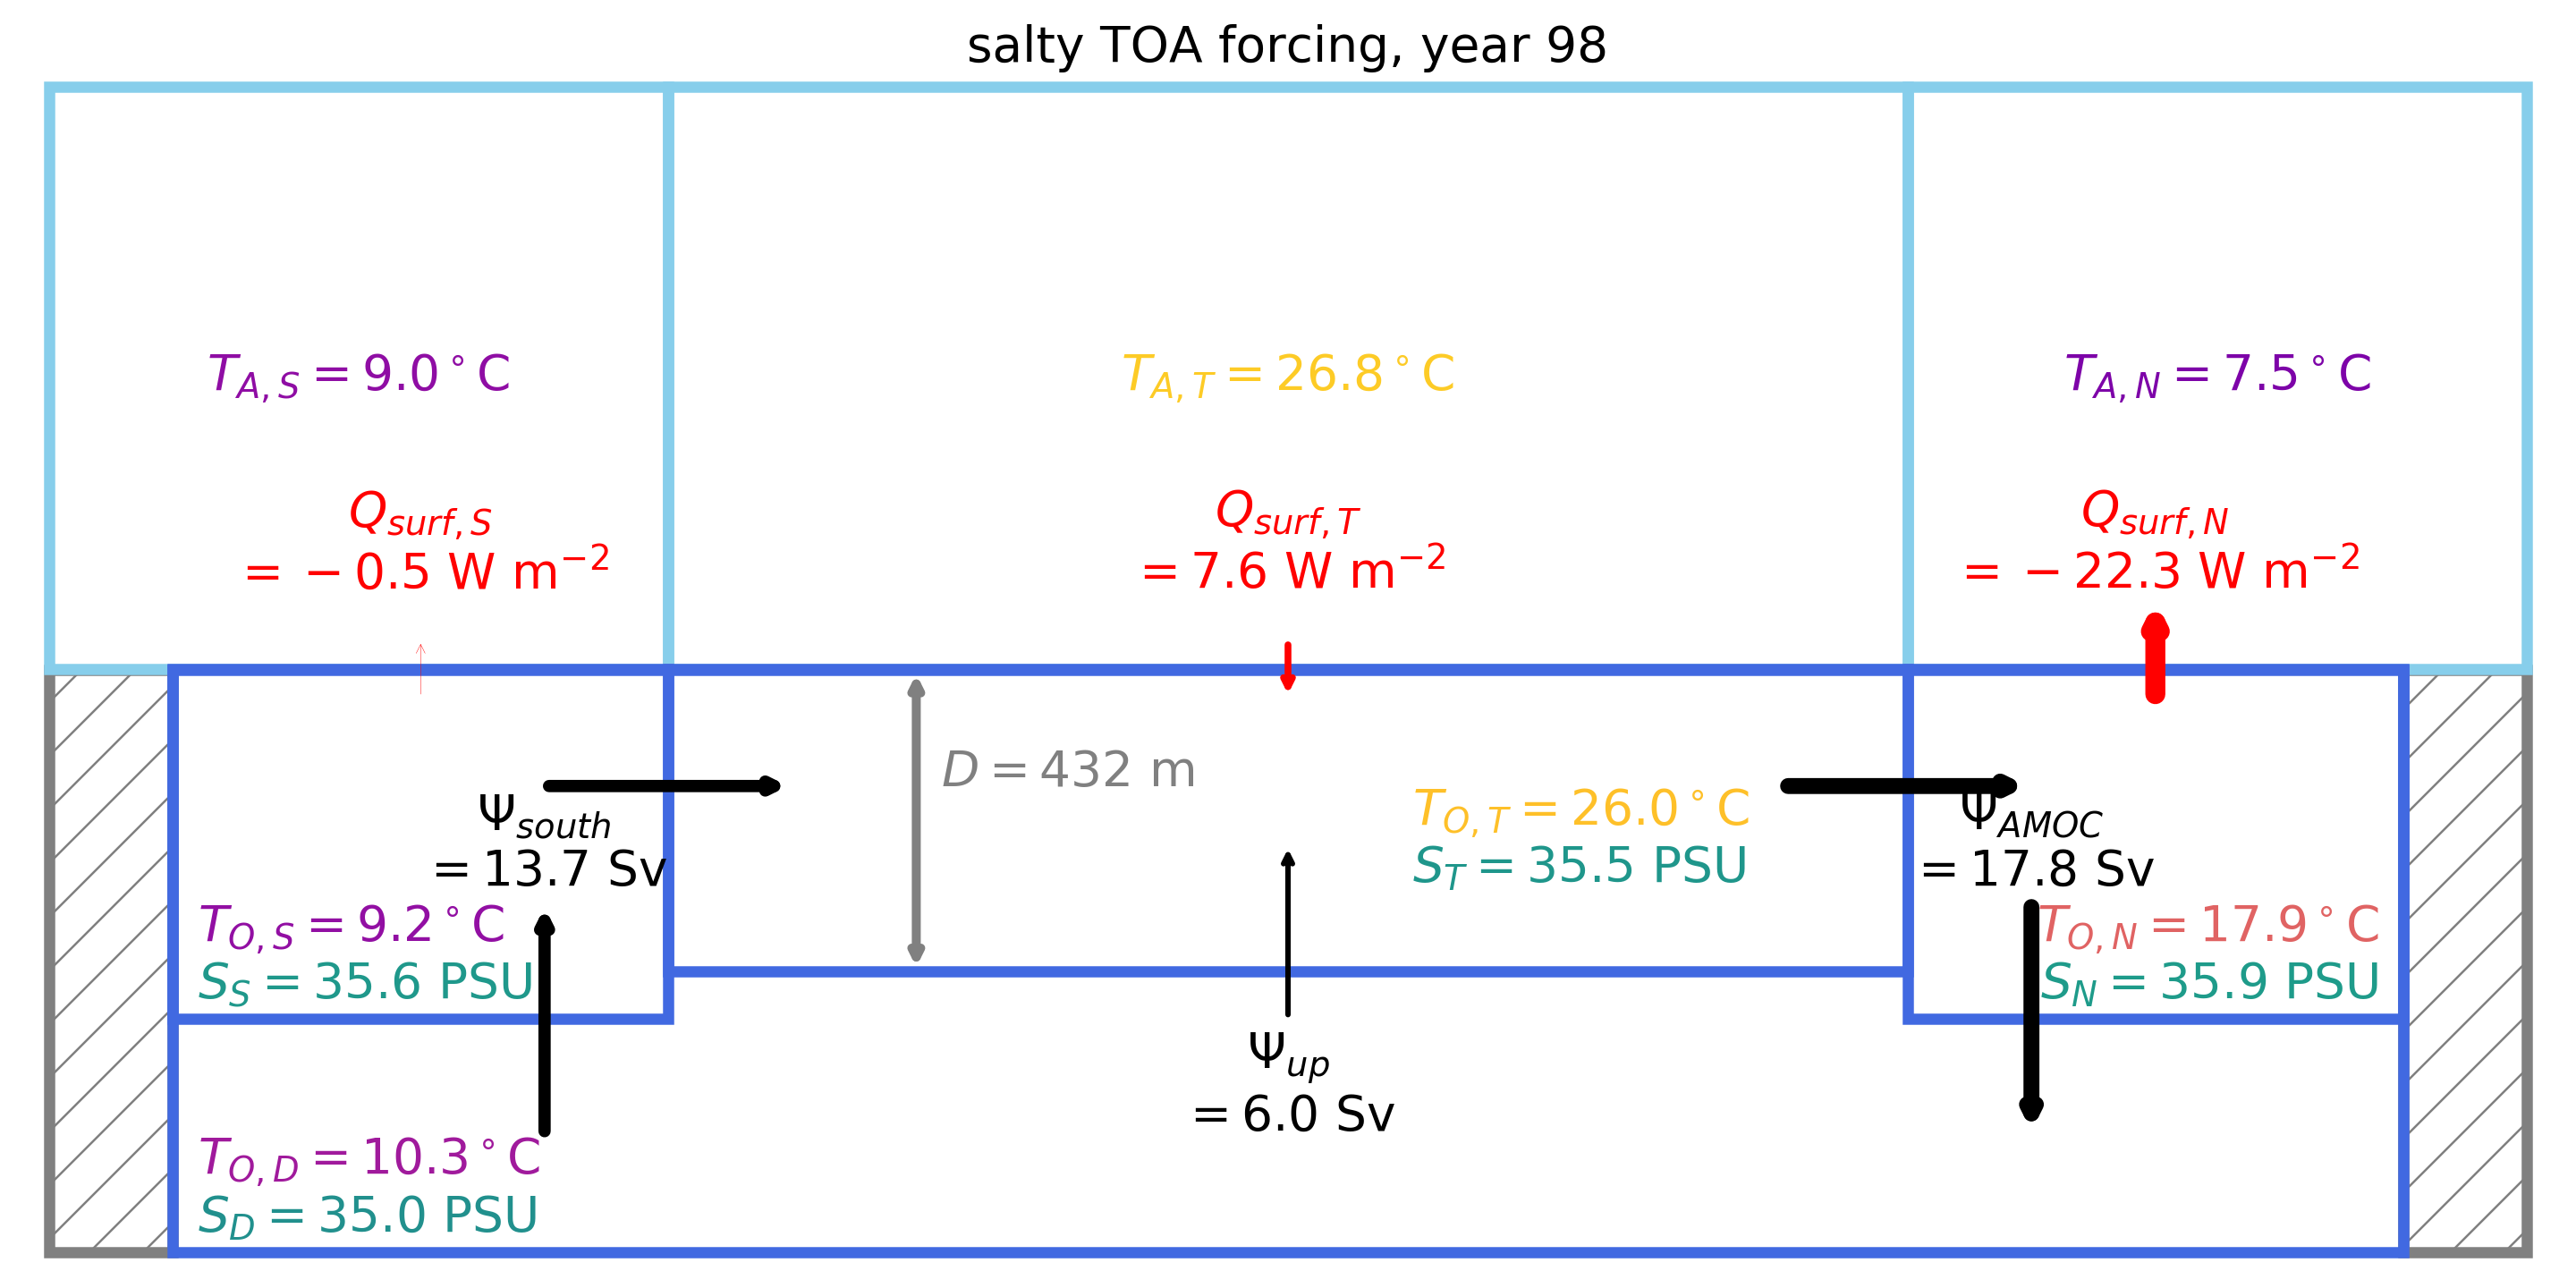

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(16, 8), dpi=90, tight_layout=True)

diags = diags_pert_salt
nstep = 50
for yi in range(nstep):
    plt.cla()
    ti = int(yi*(100/nstep)*360)
    data = np.concatenate([diags['Ta'][:, ti], diags['To'][:, ti], diags['S'][:, ti], diags['D'][:, ti],
                           diags['Psi'][:, ti], diags['Qsurf'][:, ti]])

    aobox.plot.schematic(data, ax=ax)
    ax.set_title("salty TOA forcing, year {}".format(int(ti/360)), fontsize=22)
    fig.canvas.draw()
    time.sleep(0.05)

<IPython.core.display.Javascript object>


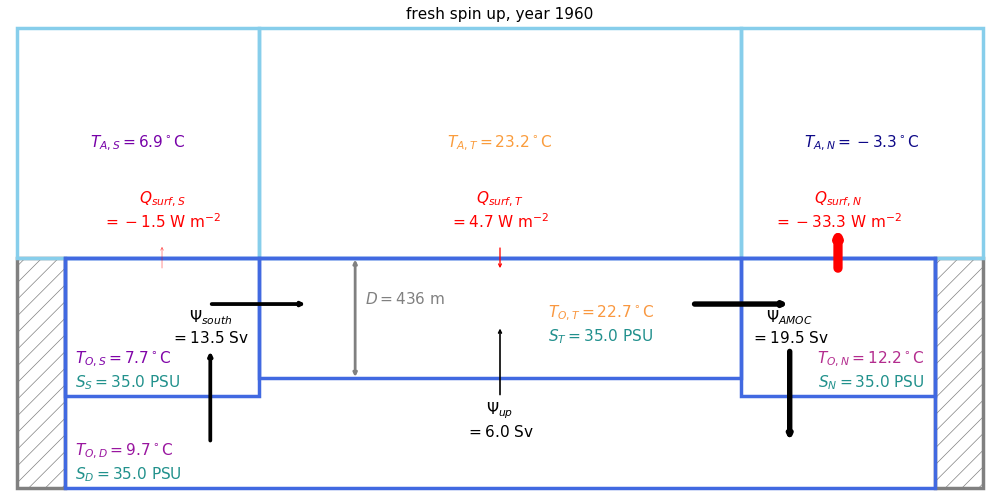

In [8]:
# Plot time ev. of fresh spin up
fig, ax = plt.subplots(1, 1, figsize=(20, 10), dpi=50, tight_layout=True)

diags = diags_cont_nosalt
nstep = 50
for yi in range(nstep):
    plt.cla()
    ti = int(yi*(nyear/nstep)*360)
    data = np.concatenate([diags['Ta'][:, ti], diags['To'][:, ti], diags['S'][:, ti], diags['D'][:, ti],
                           diags['Psi'][:, ti], diags['Qsurf'][:, ti]])

    aobox.plot.schematic(data, ax=ax)
    ax.set_title("fresh spin up, year {}".format(int(ti/360)), fontsize=22)
    fig.canvas.draw()
    time.sleep(0.05)
    

In [10]:
# Perform TOA forcing to fresh run
diags_pert_fresh = aobox.model.run(init=diags_cont_nosalt['final_state'], parms=parms, fix_salt=True,
                                   nyear=100, forcing_type='linear', Qtoap=[0.0, 100.0, 0.0])

<IPython.core.display.Javascript object>


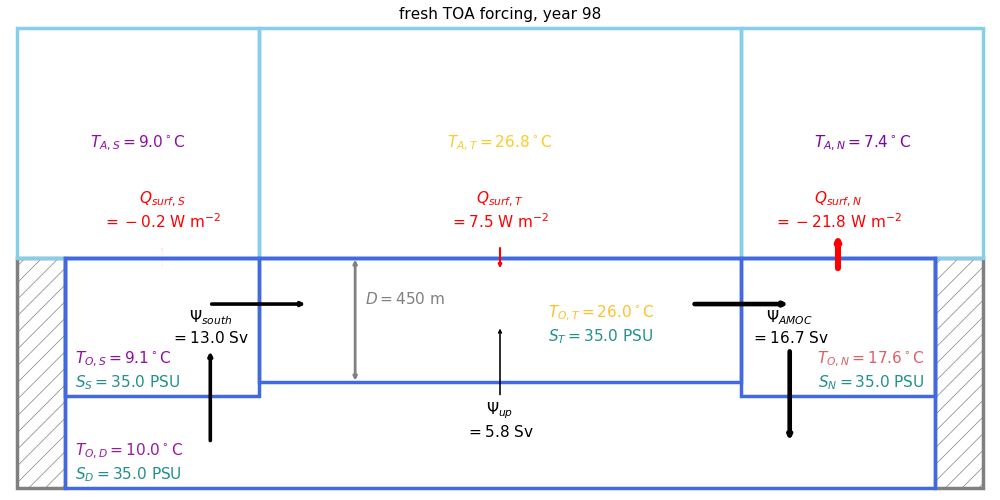

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10), dpi=50, tight_layout=True)

diags = diags_pert_fresh
nstep = 50
for yi in range(nstep):
    plt.cla()
    ti = int(yi*(100/nstep)*360)
    data = np.concatenate([diags['Ta'][:, ti], diags['To'][:, ti], diags['S'][:, ti], diags['D'][:, ti],
                           diags['Psi'][:, ti], diags['Qsurf'][:, ti]])

    aobox.plot.schematic(data, ax=ax)
    ax.set_title("fresh TOA forcing, year {}".format(int(ti/360)), fontsize=22)
    fig.canvas.draw()
    time.sleep(0.05)